In [1]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

In [84]:
train_data = pd.read_csv('Final_Train_Dataset.csv')
train_data.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [85]:
test_data = pd.read_csv('Final_Test_Dataset.csv')
test_data.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40


In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            19802 non-null  int64 
 1   experience            19802 non-null  object
 2   job_description       15384 non-null  object
 3   job_desig             19802 non-null  object
 4   job_type              4797 non-null   object
 5   key_skills            19801 non-null  object
 6   location              19802 non-null  object
 7   salary                19802 non-null  object
 8   company_name_encoded  19802 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [87]:
train_data.drop(['Unnamed: 0', 'job_description', 'job_desig', 'key_skills'], axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            19802 non-null  object
 1   job_type              4797 non-null   object
 2   location              19802 non-null  object
 3   salary                19802 non-null  object
 4   company_name_encoded  19802 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 773.6+ KB


In [88]:
test_data.drop(['job_description', 'job_desig', 'key_skills'], axis=1, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            6601 non-null   object
 1   job_type              1637 non-null   object
 2   location              6601 non-null   object
 3   company_name_encoded  6601 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 206.4+ KB


### Dealing with missing values

In [89]:
train_data['job_type'].value_counts()

Analytics    3747
analytics     921
ANALYTICS      77
analytic       32
Analytic       20
Name: job_type, dtype: int64

In [90]:
train_data['job_type'] = train_data['job_type'].replace(to_replace=
                            ['Analytics', 'analytics', 'ANALYTICS', 'analytic', 'Analytic'], value='ANALYTICS')
train_data['job_type'].value_counts()

ANALYTICS    4797
Name: job_type, dtype: int64

In [91]:
test_data['job_type'] = test_data['job_type'].replace(to_replace=
                            ['Analytics', 'analytics', 'ANALYTICS', 'analytic', 'Analytic'], value='ANALYTICS')
test_data['job_type'].value_counts()

ANALYTICS    1637
Name: job_type, dtype: int64

In [92]:
train_data['job_type'].isnull().value_counts()

True     15005
False     4797
Name: job_type, dtype: int64

In [93]:
test_data['job_type'].isnull().value_counts()

True     4964
False    1637
Name: job_type, dtype: int64

In [94]:
train_data['job_type'].replace(np.nan, 'NON-ANALYTICS', inplace=True )
#train_data.dropna(inplace=True)

In [95]:
test_data['job_type'].replace(np.nan, 'NON-ANALYTICS', inplace=True )
#test_data.dropna(inplace=True)

In [96]:
train_data['job_type'].isnull().value_counts()

False    19802
Name: job_type, dtype: int64

In [97]:
test_data['job_type'].isnull().value_counts()

False    6601
Name: job_type, dtype: int64

In [98]:
train_data.isnull().sum()

experience              0
job_type                0
location                0
salary                  0
company_name_encoded    0
dtype: int64

In [99]:
test_data.isnull().sum()

experience              0
job_type                0
location                0
company_name_encoded    0
dtype: int64

In [100]:
train_data.head()

,experience,job_type,location,salary,company_name_encoded
0,5-7 yrs,NON-ANALYTICS,Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,NON-ANALYTICS,Sonepat,10to15,458
2,5-9 yrs,ANALYTICS,Delhi NCR,15to25,4195
3,7-10 yrs,ANALYTICS,Bengaluru,10to15,313
4,1-3 yrs,NON-ANALYTICS,Gurgaon,3to6,1305


In [101]:
test_data.head()

,experience,job_type,location,company_name_encoded
0,7-12 yrs,NON-ANALYTICS,Bengaluru,2066
1,0-5 yrs,NON-ANALYTICS,Ahmedabad(Sola),2629
2,3-6 yrs,NON-ANALYTICS,Bengaluru,2448
3,0-3 yrs,NON-ANALYTICS,"Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711
4,0-5 yrs,NON-ANALYTICS,Hyderabad,40


In [102]:
def convert_years(x):
    years = x.split(' ')[0]
    years = years.split('-')
    return int(years[0]) + int(years[1]) / 2

In [103]:
def convert_exp_years(x):
    years = x.split(' ')[0]
    years = years.split('-')
    return int(years[0]) + int(years[1]) / 2

In [104]:
train_data['experience'] = train_data.experience.apply(lambda x: convert_years(x))

In [105]:
test_data['experience'] = test_data.experience.apply(lambda x: convert_exp_years(x))

In [106]:
train_data.head()

,experience,job_type,location,salary,company_name_encoded
0,8.5,NON-ANALYTICS,Delhi NCR(Vikas Puri),6to10,3687
1,18.5,NON-ANALYTICS,Sonepat,10to15,458
2,9.5,ANALYTICS,Delhi NCR,15to25,4195
3,12.0,ANALYTICS,Bengaluru,10to15,313
4,2.5,NON-ANALYTICS,Gurgaon,3to6,1305


In [107]:
test_data.head()

,experience,job_type,location,company_name_encoded
0,13.0,NON-ANALYTICS,Bengaluru,2066
1,2.5,NON-ANALYTICS,Ahmedabad(Sola),2629
2,6.0,NON-ANALYTICS,Bengaluru,2448
3,1.5,NON-ANALYTICS,"Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711
4,2.5,NON-ANALYTICS,Hyderabad,40


In [108]:
train_data.salary.value_counts()

10to15    4500
15to25    4125
6to10     3533
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [109]:
salary_map  = {'10to15':4,
              '15to25':5,
              '6to10':3,
              '0to3':1,
              '3to6':2,
              '25to50':6}
train_data['salary'] = train_data.salary.map(salary_map)
train_data.salary.value_counts()

4    4500
5    4125
3    3533
1    3245
2    2824
6    1575
Name: salary, dtype: int64

In [111]:
train_data.head()

,experience,job_type,location,salary,company_name_encoded
0,8.5,NON-ANALYTICS,Delhi NCR(Vikas Puri),3,3687
1,18.5,NON-ANALYTICS,Sonepat,4,458
2,9.5,ANALYTICS,Delhi NCR,5,4195
3,12.0,ANALYTICS,Bengaluru,4,313
4,2.5,NON-ANALYTICS,Gurgaon,2,1305


In [112]:
train_data.location.value_counts(ascending=True)

Mumbai(Mumbadevi Area)                                                             1
Chennai, Pune, Bengaluru, Hyderabad                                                1
Bengaluru(Yelahanka+1)                                                             1
gonda, balrampur, araria, begusarai, banka, bhojpur, buxar, gopalgang, jamui       1
Agra, Amritsar, Anand, Belgaum, Cuttack, Dehradun, Indore, Kota, Port Blair        1
                                                                                ... 
Hyderabad                                                                       1083
Pune                                                                            1193
Gurgaon                                                                         1644
Mumbai                                                                          2508
Bengaluru                                                                       4168
Name: location, Length: 1504, dtype: int64

In [113]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'location' in train data. 
train_data['location']= label_encoder.fit_transform(train_data['location']) 
  
train_data['location'].unique()

array([ 597, 1412,  525, ...,  324,   65, 1117])

In [114]:
# Encode labels in column 'location' in test data. 
test_data['location']= label_encoder.fit_transform(test_data['location']) 
  
test_data['location'].unique()

array([ 56,  17, 321, 453, 194, 421, 793, 207, 546, 495, 232, 272, 439,
       704, 347, 413, 283, 303, 662, 667, 120, 628, 104, 271, 309, 365,
       336, 348, 212,  67, 632, 459, 408, 595, 516, 677, 265, 192, 422,
       190, 719, 565, 440, 138, 769,  15, 731, 326, 198, 751, 706, 466,
       467, 612, 732, 148, 123, 727, 779, 730, 101, 113, 131,  21, 545,
       340, 537, 534, 308,  60, 394, 796, 785, 737, 238, 405, 418, 226,
       181, 616, 512, 794, 221,  39, 211, 657, 629, 140, 475, 470,   4,
       563, 171, 330, 122,  73, 708,  53, 579, 367, 549, 747, 410, 111,
       588, 346, 485, 509,  44, 718, 536, 634, 331, 317, 318,  38, 357,
       761, 716, 332, 569, 748,   0, 322, 345, 598, 169, 778,   6, 266,
       765, 600, 184, 488, 699, 548, 547, 477, 768, 575, 275, 481, 191,
       788, 766,  97, 472, 582, 692, 143, 368, 576,  83, 615, 176, 542,
       776, 682,  48, 361, 596, 183, 524, 229, 556, 188, 508, 254, 772,
       220, 399, 126, 222,  34, 419, 301, 518, 312, 750, 432, 56

In [115]:
train_data.location.value_counts()

114     4168
1027    2508
811     1644
1301    1193
863     1083
        ... 
1205       1
1189       1
1173       1
1211       1
1495       1
Name: location, Length: 1504, dtype: int64

In [116]:
train_data.head()

,experience,job_type,location,salary,company_name_encoded
0,8.5,NON-ANALYTICS,597,3,3687
1,18.5,NON-ANALYTICS,1412,4,458
2,9.5,ANALYTICS,525,5,4195
3,12.0,ANALYTICS,114,4,313
4,2.5,NON-ANALYTICS,811,2,1305


In [117]:
test_data.head()

,experience,job_type,location,company_name_encoded
0,13.0,NON-ANALYTICS,56,2066
1,2.5,NON-ANALYTICS,17,2629
2,6.0,NON-ANALYTICS,56,2448
3,1.5,NON-ANALYTICS,321,2711
4,2.5,NON-ANALYTICS,453,40


### Visualization

In [120]:
train_data.experience.value_counts()

5.5     1501
10.0    1471
7.0     1275
4.5     1188
2.5     1018
        ... 
29.5       1
32.5       1
33.0       1
26.5       1
38.0       1
Name: experience, Length: 68, dtype: int64

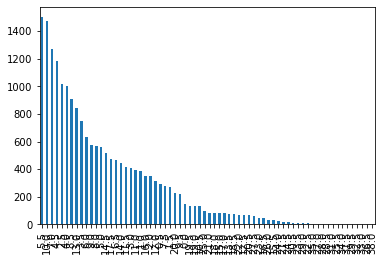

In [128]:
train_data.experience.value_counts().plot(kind='bar', subplots = False)

In [35]:
dummies = pd.get_dummies(train_data.job_type)
train_data = pd.concat([train_data,dummies.drop('NON-ANALYTICS',axis='columns')],axis='columns')
train_data.head()

,experience,job_type,location,salary,company_name_encoded,ANALYTICS
0,8.5,NON-ANALYTICS,597,3,3687,0
1,18.5,NON-ANALYTICS,1412,1,458,0
2,9.5,ANALYTICS,525,2,4195,1
3,12.0,ANALYTICS,114,1,313,1
4,2.5,NON-ANALYTICS,811,5,1305,0


In [36]:
dummies = pd.get_dummies(test_data.job_type)
test_data = pd.concat([test_data,dummies.drop('NON-ANALYTICS',axis='columns')],axis='columns')
test_data.head()

,experience,job_type,location,company_name_encoded,ANALYTICS
0,13.0,NON-ANALYTICS,56,2066,0
1,2.5,NON-ANALYTICS,17,2629,0
2,6.0,NON-ANALYTICS,56,2448,0
3,1.5,NON-ANALYTICS,321,2711,0
4,2.5,NON-ANALYTICS,453,40,0


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   experience            19802 non-null  float64
 1   job_type              19802 non-null  object 
 2   location              19802 non-null  int32  
 3   salary                19802 non-null  int64  
 4   company_name_encoded  19802 non-null  int64  
 5   ANALYTICS             19802 non-null  uint8  
dtypes: float64(1), int32(1), int64(2), object(1), uint8(1)
memory usage: 715.6+ KB


In [38]:
train_data.drop(['job_type', 'location'], axis=1, inplace=True)

In [39]:
test_data.drop(['job_type', 'location'], axis=1, inplace=True)

In [40]:
train_data.head()

,experience,salary,company_name_encoded,ANALYTICS
0,8.5,3,3687,0
1,18.5,1,458,0
2,9.5,2,4195,1
3,12.0,1,313,1
4,2.5,5,1305,0


In [41]:
X = train_data.drop('salary', axis=1)
y = train_data['salary']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [66]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

In [67]:
### Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_train_acc = round(lr.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(lr_train_acc) + '%')

lr_test_acc = round(lr.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(lr_test_acc) + '%')

Train Accuracy: 2.2%
Test Accuracy: 2.15%


In [68]:
### Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred_lr = logr.predict(X_test)
logr_train_acc = round(logr.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(logr_train_acc) + '%')

logr_test_acc = round(logr.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(logr_test_acc) + '%')

Train Accuracy: 30.81%
Test Accuracy: 32.14%


In [69]:
### Support Vector
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

acc_svc = round(clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_svc) + '%')

Train Accuracy: 23.58%
Test Accuracy: 23.1%


In [70]:
# Linear SVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_linear_svc) + '%')

acc_linear_svc = round(clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_linear_svc) + '%')

Train Accuracy: 30.3%
Test Accuracy: 31.05%


In [71]:
# KN Neighbors
kn_clf = KNeighborsClassifier(n_neighbors = 2)
kn_clf.fit(X_train, y_train)
y_pred_knn = kn_clf.predict(X_test)
acc_knn = round(kn_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_knn) + '%')

acc_knn = round(kn_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_knn) + '%')

Train Accuracy: 63.85%
Test Accuracy: 39.06%


In [72]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = round(dt_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_dt) + '%')

acc_knn = round(kn_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_knn) + '%')

Train Accuracy: 79.07%
Test Accuracy: 39.06%


In [73]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = round(rf_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_rf) + '%')

acc_rf = round(rf_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_rf) + '%')

Train Accuracy: 79.07%
Test Accuracy: 36.99%


In [74]:
# GaussionNB Classifier
gb_clf = GaussianNB()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
acc_gb = round(gb_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_gb) + '%')

acc_gb = round(rf_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_gb) + '%')

Train Accuracy: 38.03%
Test Accuracy: 36.99%


In [75]:
# CatBoost Classification
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_pred_cb = cb_clf.predict(X_test)
acc_cb = round(cb_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_cb) + '%')

acc_cb = round(cb_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_cb) + '%')

Learning rate set to 0.091099
0:	learn: 1.7320799	total: 25ms	remaining: 25s
1:	learn: 1.6800650	total: 38.8ms	remaining: 19.3s
2:	learn: 1.6366910	total: 51.2ms	remaining: 17s
3:	learn: 1.5994916	total: 62.8ms	remaining: 15.6s
4:	learn: 1.5668713	total: 72.4ms	remaining: 14.4s
5:	learn: 1.5411161	total: 82.5ms	remaining: 13.7s
6:	learn: 1.5190704	total: 92ms	remaining: 13.1s
7:	learn: 1.4989551	total: 102ms	remaining: 12.6s
8:	learn: 1.4820980	total: 109ms	remaining: 12s
9:	learn: 1.4666112	total: 119ms	remaining: 11.7s
10:	learn: 1.4538175	total: 128ms	remaining: 11.5s
11:	learn: 1.4420973	total: 138ms	remaining: 11.4s
12:	learn: 1.4320860	total: 147ms	remaining: 11.2s
13:	learn: 1.4227213	total: 157ms	remaining: 11s
14:	learn: 1.4135638	total: 166ms	remaining: 10.9s
15:	learn: 1.4065538	total: 179ms	remaining: 11s
16:	learn: 1.3997982	total: 194ms	remaining: 11.2s
17:	learn: 1.3943674	total: 208ms	remaining: 11.4s
18:	learn: 1.3891342	total: 220ms	remaining: 11.3s
19:	learn: 1.38254

162:	learn: 1.2761731	total: 1.74s	remaining: 8.96s
163:	learn: 1.2758824	total: 1.76s	remaining: 8.96s
164:	learn: 1.2752883	total: 1.77s	remaining: 8.95s
165:	learn: 1.2749324	total: 1.78s	remaining: 8.93s
166:	learn: 1.2746295	total: 1.79s	remaining: 8.92s
167:	learn: 1.2743262	total: 1.8s	remaining: 8.9s
168:	learn: 1.2738591	total: 1.81s	remaining: 8.88s
169:	learn: 1.2733690	total: 1.82s	remaining: 8.87s
170:	learn: 1.2732303	total: 1.82s	remaining: 8.85s
171:	learn: 1.2729826	total: 1.83s	remaining: 8.83s
172:	learn: 1.2724990	total: 1.84s	remaining: 8.82s
173:	learn: 1.2722341	total: 1.85s	remaining: 8.8s
174:	learn: 1.2719761	total: 1.86s	remaining: 8.79s
175:	learn: 1.2712209	total: 1.87s	remaining: 8.77s
176:	learn: 1.2710053	total: 1.88s	remaining: 8.76s
177:	learn: 1.2707983	total: 1.89s	remaining: 8.74s
178:	learn: 1.2706647	total: 1.9s	remaining: 8.72s
179:	learn: 1.2701981	total: 1.91s	remaining: 8.71s
180:	learn: 1.2700295	total: 1.92s	remaining: 8.69s
181:	learn: 1.26

328:	learn: 1.2337639	total: 3.52s	remaining: 7.18s
329:	learn: 1.2335485	total: 3.53s	remaining: 7.17s
330:	learn: 1.2334386	total: 3.54s	remaining: 7.16s
331:	learn: 1.2331146	total: 3.56s	remaining: 7.15s
332:	learn: 1.2329606	total: 3.56s	remaining: 7.14s
333:	learn: 1.2326500	total: 3.58s	remaining: 7.13s
334:	learn: 1.2323495	total: 3.58s	remaining: 7.12s
335:	learn: 1.2321788	total: 3.59s	remaining: 7.1s
336:	learn: 1.2320493	total: 3.6s	remaining: 7.09s
337:	learn: 1.2318715	total: 3.61s	remaining: 7.08s
338:	learn: 1.2317140	total: 3.62s	remaining: 7.06s
339:	learn: 1.2315332	total: 3.63s	remaining: 7.05s
340:	learn: 1.2313149	total: 3.64s	remaining: 7.04s
341:	learn: 1.2311935	total: 3.65s	remaining: 7.03s
342:	learn: 1.2310677	total: 3.66s	remaining: 7.02s
343:	learn: 1.2309210	total: 3.67s	remaining: 7s
344:	learn: 1.2306597	total: 3.68s	remaining: 6.99s
345:	learn: 1.2303960	total: 3.69s	remaining: 6.98s
346:	learn: 1.2301754	total: 3.71s	remaining: 6.97s
347:	learn: 1.229

488:	learn: 1.2042770	total: 5.29s	remaining: 5.53s
489:	learn: 1.2041867	total: 5.3s	remaining: 5.52s
490:	learn: 1.2040643	total: 5.31s	remaining: 5.5s
491:	learn: 1.2038841	total: 5.33s	remaining: 5.5s
492:	learn: 1.2037606	total: 5.33s	remaining: 5.49s
493:	learn: 1.2036757	total: 5.35s	remaining: 5.48s
494:	learn: 1.2034732	total: 5.36s	remaining: 5.46s
495:	learn: 1.2033226	total: 5.37s	remaining: 5.45s
496:	learn: 1.2032178	total: 5.37s	remaining: 5.44s
497:	learn: 1.2030772	total: 5.38s	remaining: 5.43s
498:	learn: 1.2029721	total: 5.39s	remaining: 5.42s
499:	learn: 1.2028631	total: 5.4s	remaining: 5.4s
500:	learn: 1.2026532	total: 5.41s	remaining: 5.39s
501:	learn: 1.2025245	total: 5.42s	remaining: 5.38s
502:	learn: 1.2023363	total: 5.43s	remaining: 5.37s
503:	learn: 1.2022039	total: 5.44s	remaining: 5.36s
504:	learn: 1.2019538	total: 5.45s	remaining: 5.34s
505:	learn: 1.2017661	total: 5.46s	remaining: 5.33s
506:	learn: 1.2016706	total: 5.47s	remaining: 5.32s
507:	learn: 1.201

652:	learn: 1.1815280	total: 7.07s	remaining: 3.76s
653:	learn: 1.1813313	total: 7.08s	remaining: 3.75s
654:	learn: 1.1812769	total: 7.1s	remaining: 3.74s
655:	learn: 1.1810991	total: 7.11s	remaining: 3.73s
656:	learn: 1.1809439	total: 7.12s	remaining: 3.71s
657:	learn: 1.1808801	total: 7.13s	remaining: 3.7s
658:	learn: 1.1806860	total: 7.14s	remaining: 3.69s
659:	learn: 1.1805192	total: 7.15s	remaining: 3.68s
660:	learn: 1.1803516	total: 7.16s	remaining: 3.67s
661:	learn: 1.1802497	total: 7.16s	remaining: 3.66s
662:	learn: 1.1802073	total: 7.17s	remaining: 3.65s
663:	learn: 1.1800655	total: 7.18s	remaining: 3.63s
664:	learn: 1.1799394	total: 7.19s	remaining: 3.62s
665:	learn: 1.1798784	total: 7.2s	remaining: 3.61s
666:	learn: 1.1795607	total: 7.21s	remaining: 3.6s
667:	learn: 1.1794185	total: 7.22s	remaining: 3.59s
668:	learn: 1.1792766	total: 7.23s	remaining: 3.58s
669:	learn: 1.1791393	total: 7.24s	remaining: 3.57s
670:	learn: 1.1790515	total: 7.25s	remaining: 3.56s
671:	learn: 1.17

826:	learn: 1.1610780	total: 8.83s	remaining: 1.85s
827:	learn: 1.1609801	total: 8.84s	remaining: 1.84s
828:	learn: 1.1608498	total: 8.85s	remaining: 1.83s
829:	learn: 1.1606844	total: 8.86s	remaining: 1.81s
830:	learn: 1.1605469	total: 8.87s	remaining: 1.8s
831:	learn: 1.1604879	total: 8.88s	remaining: 1.79s
832:	learn: 1.1603063	total: 8.89s	remaining: 1.78s
833:	learn: 1.1602643	total: 8.9s	remaining: 1.77s
834:	learn: 1.1601657	total: 8.91s	remaining: 1.76s
835:	learn: 1.1600897	total: 8.92s	remaining: 1.75s
836:	learn: 1.1600120	total: 8.93s	remaining: 1.74s
837:	learn: 1.1598556	total: 8.94s	remaining: 1.73s
838:	learn: 1.1597443	total: 8.95s	remaining: 1.72s
839:	learn: 1.1595745	total: 8.96s	remaining: 1.71s
840:	learn: 1.1594894	total: 8.97s	remaining: 1.7s
841:	learn: 1.1594206	total: 8.98s	remaining: 1.68s
842:	learn: 1.1592122	total: 8.99s	remaining: 1.67s
843:	learn: 1.1590239	total: 9s	remaining: 1.66s
844:	learn: 1.1589459	total: 9.01s	remaining: 1.65s
845:	learn: 1.1587

985:	learn: 1.1451363	total: 10.6s	remaining: 151ms
986:	learn: 1.1450256	total: 10.6s	remaining: 140ms
987:	learn: 1.1449535	total: 10.6s	remaining: 129ms
988:	learn: 1.1449087	total: 10.7s	remaining: 119ms
989:	learn: 1.1448575	total: 10.7s	remaining: 108ms
990:	learn: 1.1446994	total: 10.7s	remaining: 97.1ms
991:	learn: 1.1445286	total: 10.7s	remaining: 86.4ms
992:	learn: 1.1444425	total: 10.7s	remaining: 75.6ms
993:	learn: 1.1443638	total: 10.7s	remaining: 64.8ms
994:	learn: 1.1442926	total: 10.8s	remaining: 54ms
995:	learn: 1.1441295	total: 10.8s	remaining: 43.2ms
996:	learn: 1.1440568	total: 10.8s	remaining: 32.4ms
997:	learn: 1.1439508	total: 10.8s	remaining: 21.6ms
998:	learn: 1.1439136	total: 10.8s	remaining: 10.8ms
999:	learn: 1.1438248	total: 10.8s	remaining: 0us
Train Accuracy: 52.33%
Test Accuracy: 43.27%


In [76]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)
y_pred_mnb = mnb_clf.predict(X_test)
acc_mnb = round(mnb_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_mnb) + '%')

acc_mnb = round(mnb_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_mnb) + '%')

Train Accuracy: 25.48%
Test Accuracy: 25.78%


In [77]:
test_predict = cb_clf.predict(test_data)
test_predict

array([[1],
       [4],
       [1],
       ...,
       [1],
       [2],
       [1]], dtype=int64)

In [78]:
y_test_pred = pd.DataFrame(test_predict,columns=[   'salary'   ])
y_test_pred.to_csv('submission_cf.csv', index=False)
pred_data = pd.read_csv('submission_cf.csv')
pred_data.head()

,salary
0,1
1,4
2,1
3,4
4,4


In [79]:
salary_map  = {1:'10to15',
               2:'15to25',
               3:'6to10',
               4:'0to3',
               5:'3to6',
               6:'25to50'}
y_test_pred[   'salary'   ] = y_test_pred[   'salary'   ].map(salary_map)
y_test_pred.head()

,salary
0,10to15
1,0to3
2,10to15
3,0to3
4,0to3


In [81]:
y_test_pred.columns = [   'salary'   ]
y_test_pred.to_csv("submission_cb.csv", index=False)

In [ ]:
### Manual Hyperparameter Tuning
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [3, 6, 9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

In [ ]:
 rf_randomcv.best_params_

In [ ]:
rf_randomcv

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
best_random_grid

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
best_random_grid.score(X_test, y_test)

In [ ]:
y_rfc = best_random_grid.predict(X_test)

In [ ]:
y_rfc

In [ ]:
test_predict = best_random_grid.predict(test_data)
test_predict

In [ ]:
y_test_pred = pd.DataFrame(test_predict,columns=[   'SECTION'   ])
y_test_pred.to_csv('submission.csv', index=False)

In [ ]:
pred_data = pd.read_csv('submission.csv')
pred_data.head()

In [ ]:
salary_map  = {1:'10to15',
               2:'15to25',
               3:'6to10',
               4:'0to3',
               5:'3to6',
               6:'25to50'}
y_test_pred[   'SECTION'   ] = y_test_pred[   'SECTION'   ].map(salary_map)
y_test_pred.head()

In [ ]:
y_test_pred.columns = [   'salary'   ]
y_test_pred.to_csv("submission.csv")

In [ ]:
from sklearn.model_selectjion import GridSearchCV

In [ ]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
best_grid.score(X_test, y_test)

In [ ]:
y_pred = best_grid.predict(test_data)
y_pred

In [ ]:
y_test_pred = pd.DataFrame(y_pred,columns=[   'SECTION'   ])
y_test_pred.to_csv('submission.csv', index=False)
pred_data = pd.read_csv('submission.csv')
pred_data.head()

In [ ]:
salary_map  = {1:'10to15',
               2:'15to25',
               3:'6to10',
               4:'0to3',
               5:'3to6',
               6:'25to50'}
y_test_pred[   'SECTION'   ] = y_test_pred[   'SECTION'   ].map(salary_map)
y_test_pred.head()

In [ ]:
y_test_pred.columns = [   'salary'   ]
y_test_pred.to_csv("submission.csv")

In [96]:
from catboost import CatBoostClassifier

In [97]:
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.084168
0:	learn: 1.7365830	total: 88.6ms	remaining: 1m 28s
1:	learn: 1.6932042	total: 117ms	remaining: 58.5s
2:	learn: 1.6594066	total: 131ms	remaining: 43.6s
3:	learn: 1.6266826	total: 148ms	remaining: 37s
4:	learn: 1.5965390	total: 166ms	remaining: 33s
5:	learn: 1.5683122	total: 186ms	remaining: 30.8s
6:	learn: 1.5467310	total: 206ms	remaining: 29.2s
7:	learn: 1.5275103	total: 219ms	remaining: 27.2s
8:	learn: 1.5105472	total: 231ms	remaining: 25.4s
9:	learn: 1.4941726	total: 246ms	remaining: 24.4s
10:	learn: 1.4782473	total: 259ms	remaining: 23.2s
11:	learn: 1.4657310	total: 270ms	remaining: 22.2s
12:	learn: 1.4539527	total: 281ms	remaining: 21.3s
13:	learn: 1.4434768	total: 292ms	remaining: 20.6s
14:	learn: 1.4337688	total: 303ms	remaining: 19.9s
15:	learn: 1.4246963	total: 314ms	remaining: 19.3s
16:	learn: 1.4152176	total: 325ms	remaining: 18.8s
17:	learn: 1.4073608	total: 337ms	remaining: 18.4s
18:	learn: 1.4009868	total: 349ms	remaining: 18s
19:	learn: 1.39

165:	learn: 1.2225803	total: 1.72s	remaining: 8.65s
166:	learn: 1.2218289	total: 1.73s	remaining: 8.62s
167:	learn: 1.2210240	total: 1.74s	remaining: 8.59s
168:	learn: 1.2202554	total: 1.74s	remaining: 8.57s
169:	learn: 1.2197321	total: 1.75s	remaining: 8.55s
170:	learn: 1.2184133	total: 1.76s	remaining: 8.54s
171:	learn: 1.2179345	total: 1.77s	remaining: 8.53s
172:	learn: 1.2171311	total: 1.78s	remaining: 8.52s
173:	learn: 1.2166820	total: 1.79s	remaining: 8.51s
174:	learn: 1.2156801	total: 1.8s	remaining: 8.51s
175:	learn: 1.2152311	total: 1.81s	remaining: 8.5s
176:	learn: 1.2149611	total: 1.82s	remaining: 8.49s
177:	learn: 1.2141341	total: 1.83s	remaining: 8.47s
178:	learn: 1.2136300	total: 1.84s	remaining: 8.46s
179:	learn: 1.2129936	total: 1.85s	remaining: 8.45s
180:	learn: 1.2120260	total: 1.87s	remaining: 8.45s
181:	learn: 1.2113958	total: 1.88s	remaining: 8.43s
182:	learn: 1.2109848	total: 1.88s	remaining: 8.4s
183:	learn: 1.2105569	total: 1.89s	remaining: 8.39s
184:	learn: 1.2

337:	learn: 1.1470492	total: 3.39s	remaining: 6.65s
338:	learn: 1.1465838	total: 3.4s	remaining: 6.63s
339:	learn: 1.1461468	total: 3.41s	remaining: 6.62s
340:	learn: 1.1458912	total: 3.42s	remaining: 6.6s
341:	learn: 1.1455141	total: 3.42s	remaining: 6.59s
342:	learn: 1.1451512	total: 3.44s	remaining: 6.58s
343:	learn: 1.1446788	total: 3.44s	remaining: 6.57s
344:	learn: 1.1442414	total: 3.45s	remaining: 6.55s
345:	learn: 1.1440272	total: 3.46s	remaining: 6.55s
346:	learn: 1.1437689	total: 3.47s	remaining: 6.54s
347:	learn: 1.1434681	total: 3.48s	remaining: 6.53s
348:	learn: 1.1432295	total: 3.49s	remaining: 6.52s
349:	learn: 1.1425076	total: 3.5s	remaining: 6.51s
350:	learn: 1.1422019	total: 3.52s	remaining: 6.5s
351:	learn: 1.1419020	total: 3.53s	remaining: 6.49s
352:	learn: 1.1416453	total: 3.54s	remaining: 6.49s
353:	learn: 1.1412398	total: 3.55s	remaining: 6.48s
354:	learn: 1.1407721	total: 3.56s	remaining: 6.47s
355:	learn: 1.1402052	total: 3.57s	remaining: 6.46s
356:	learn: 1.13

510:	learn: 1.0956845	total: 5.06s	remaining: 4.85s
511:	learn: 1.0954292	total: 5.07s	remaining: 4.84s
512:	learn: 1.0952192	total: 5.08s	remaining: 4.82s
513:	learn: 1.0947067	total: 5.09s	remaining: 4.81s
514:	learn: 1.0944074	total: 5.1s	remaining: 4.8s
515:	learn: 1.0940644	total: 5.11s	remaining: 4.79s
516:	learn: 1.0938195	total: 5.12s	remaining: 4.78s
517:	learn: 1.0933522	total: 5.13s	remaining: 4.77s
518:	learn: 1.0931186	total: 5.14s	remaining: 4.76s
519:	learn: 1.0930465	total: 5.15s	remaining: 4.75s
520:	learn: 1.0926865	total: 5.16s	remaining: 4.75s
521:	learn: 1.0923029	total: 5.17s	remaining: 4.74s
522:	learn: 1.0918769	total: 5.18s	remaining: 4.72s
523:	learn: 1.0916624	total: 5.19s	remaining: 4.71s
524:	learn: 1.0913135	total: 5.2s	remaining: 4.71s
525:	learn: 1.0910443	total: 5.21s	remaining: 4.7s
526:	learn: 1.0908682	total: 5.22s	remaining: 4.69s
527:	learn: 1.0906889	total: 5.23s	remaining: 4.68s
528:	learn: 1.0903788	total: 5.24s	remaining: 4.67s
529:	learn: 1.09

670:	learn: 1.0611456	total: 6.6s	remaining: 3.23s
671:	learn: 1.0609918	total: 6.6s	remaining: 3.22s
672:	learn: 1.0607480	total: 6.61s	remaining: 3.21s
673:	learn: 1.0605995	total: 6.62s	remaining: 3.2s
674:	learn: 1.0603613	total: 6.62s	remaining: 3.19s
675:	learn: 1.0603099	total: 6.63s	remaining: 3.18s
676:	learn: 1.0600967	total: 6.64s	remaining: 3.17s
677:	learn: 1.0600023	total: 6.65s	remaining: 3.16s
678:	learn: 1.0598086	total: 6.66s	remaining: 3.15s
679:	learn: 1.0595880	total: 6.67s	remaining: 3.14s
680:	learn: 1.0593859	total: 6.67s	remaining: 3.13s
681:	learn: 1.0591217	total: 6.68s	remaining: 3.12s
682:	learn: 1.0587874	total: 6.69s	remaining: 3.1s
683:	learn: 1.0585933	total: 6.7s	remaining: 3.09s
684:	learn: 1.0584278	total: 6.71s	remaining: 3.08s
685:	learn: 1.0582925	total: 6.71s	remaining: 3.07s
686:	learn: 1.0580358	total: 6.72s	remaining: 3.06s
687:	learn: 1.0579277	total: 6.73s	remaining: 3.05s
688:	learn: 1.0576372	total: 6.74s	remaining: 3.04s
689:	learn: 1.057

829:	learn: 1.0322830	total: 7.88s	remaining: 1.61s
830:	learn: 1.0320418	total: 7.89s	remaining: 1.6s
831:	learn: 1.0319337	total: 7.9s	remaining: 1.59s
832:	learn: 1.0317153	total: 7.91s	remaining: 1.58s
833:	learn: 1.0315732	total: 7.91s	remaining: 1.57s
834:	learn: 1.0313019	total: 7.92s	remaining: 1.56s
835:	learn: 1.0310694	total: 7.92s	remaining: 1.55s
836:	learn: 1.0309582	total: 7.93s	remaining: 1.54s
837:	learn: 1.0308064	total: 7.94s	remaining: 1.53s
838:	learn: 1.0307409	total: 7.95s	remaining: 1.52s
839:	learn: 1.0305203	total: 7.96s	remaining: 1.52s
840:	learn: 1.0302961	total: 7.97s	remaining: 1.51s
841:	learn: 1.0301409	total: 7.98s	remaining: 1.5s
842:	learn: 1.0300304	total: 7.99s	remaining: 1.49s
843:	learn: 1.0298620	total: 8s	remaining: 1.48s
844:	learn: 1.0297377	total: 8.01s	remaining: 1.47s
845:	learn: 1.0295768	total: 8.02s	remaining: 1.46s
846:	learn: 1.0294143	total: 8.03s	remaining: 1.45s
847:	learn: 1.0290883	total: 8.04s	remaining: 1.44s
848:	learn: 1.0289

992:	learn: 1.0059231	total: 9.18s	remaining: 64.7ms
993:	learn: 1.0056741	total: 9.19s	remaining: 55.5ms
994:	learn: 1.0055563	total: 9.2s	remaining: 46.2ms
995:	learn: 1.0053973	total: 9.2s	remaining: 37ms
996:	learn: 1.0052372	total: 9.21s	remaining: 27.7ms
997:	learn: 1.0051513	total: 9.22s	remaining: 18.5ms
998:	learn: 1.0050419	total: 9.23s	remaining: 9.24ms
999:	learn: 1.0048672	total: 9.24s	remaining: 0us


In [98]:
model.score(X_test, y_test)

0.42986111111111114

In [99]:
y_pred = model.predict(test_data)
y_pred

array([[3],
       [2],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [100]:
y_test_pred = pd.DataFrame(y_pred,columns=[   'salary'   ])
y_test_pred.to_csv('submission.csv', index=False)
pred_data = pd.read_csv('submission.csv')
pred_data.head()


,salary
0,3
1,2
2,5
3,3
4,2


In [101]:
salary_map  = {1:'10to15',
               2:'15to25',
               3:'6to10',
               4:'0to3',
               5:'3to6',
               6:'25to50'}
y_test_pred[   'salary'   ] = y_test_pred[   'salary'   ].map(salary_map)
y_test_pred.head()

,salary
0,6to10
1,15to25
2,3to6
3,6to10
4,15to25


In [102]:
y_test_pred.columns = [   'salary'   ]
y_test_pred.to_csv("submission_cb.csv")